phase 1: clean the data and conduct exploratory analysis before doing any NLP 

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_to_csv = '/content/drive/MyDrive/capstone/dv/all_total.csv'
df = pd.read_csv(path_to_csv)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,created_utc,id,num_comments,score,selftext,subreddit,title,upvote_ratio,created
0,1662007007,x2ycxd,0,1.0,[removed],domesticviolence,"Women with abusive fathers, How do i get past ...",1.0,1.662032e+09
1,1662002574,x2wyl4,1,1.0,I haven't ordered/eaten our favorite food sinc...,domesticviolence,I can't even eat chocolate without thinking ab...,1.0,1.662028e+09
2,1661996523,x2uv4c,1,1.0,I think this time he's really changing this ti...,domesticviolence,How do I know he's really changing?,1.0,1.662022e+09
3,1661985458,x2qure,0,1.0,[removed],domesticviolence,Representation or no?,1.0,1.662011e+09
4,1661982397,x2pn4w,1,1.0,This is more of a rant than anything because I...,domesticviolence,Just got my 5th NFA 😭,1.0,1.662008e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431975 entries, 0 to 431974
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   created_utc   431975 non-null  object 
 1   id            431974 non-null  object 
 2   num_comments  431974 non-null  object 
 3   score         431973 non-null  float64
 4   selftext      395048 non-null  object 
 5   subreddit     431970 non-null  object 
 6   title         431970 non-null  object 
 7   upvote_ratio  412632 non-null  float64
 8   created       431970 non-null  float64
dtypes: float64(3), object(6)
memory usage: 29.7+ MB


In [6]:
#notice there are '[removed]' and many null values in selftext, so we delete those
df = df[~(df.selftext=='[removed]')]
df= df[df['selftext'].notna()]
df

,created_utc,id,num_comments,score,selftext,subreddit,title,upvote_ratio,created
1,1662002574,x2wyl4,1,1.0,I haven't ordered/eaten our favorite food sinc...,domesticviolence,I can't even eat chocolate without thinking ab...,1.0,1.662028e+09
2,1661996523,x2uv4c,1,1.0,I think this time he's really changing this ti...,domesticviolence,How do I know he's really changing?,1.0,1.662022e+09
4,1661982397,x2pn4w,1,1.0,This is more of a rant than anything because I...,domesticviolence,Just got my 5th NFA 😭,1.0,1.662008e+09
5,1661981180,x2p5sn,1,1.0,"Hi, I have been getting abused for 4 years now...",domesticviolence,Can't find the energy to leave,1.0,1.662006e+09
7,1661966939,x2jeo4,1,1.0,I’m thinking about doing couples counseling wi...,domesticviolence,Am I really at a point where I should avoid do...,1.0,1.661992e+09
...,...,...,...,...,...,...,...,...,...
431967,1546441159,abu3o7,13,1.0,What are the main things teachers pay attentio...,GetStudying,Could you help me with essay checking?,NaN,1.546466e+09
431968,1546426341,absdh6,3,1.0,Hi everyone! This is the Accountability Thread...,GetStudying,"Daily Accountability Thread - January 02, 2019",NaN,1.546452e+09
431969,1546360117,abjfcb,16,1.0,My new year's resolution for my academics is t...,GetStudying,How to improve discipline with studying and da...,NaN,1.546385e+09
431972,1546351044,abicqo,23,1.0,"So, I am doing a 2 year technical degree in el...",GetStudying,I can only manage to study the subjects I find...,NaN,1.546376e+09


In [7]:
df.isna().sum()

created_utc        0
id                 0
num_comments       0
score              1
selftext           0
subreddit          3
title              3
upvote_ratio    6491
created            3
dtype: int64

In [8]:
#concatenate each title with its corresponding bodies
df['all_text']= df['title']+" "+ df['selftext']
df.head()

,created_utc,id,num_comments,score,selftext,subreddit,title,upvote_ratio,created,all_text
1,1662002574,x2wyl4,1,1.0,I haven't ordered/eaten our favorite food sinc...,domesticviolence,I can't even eat chocolate without thinking ab...,1.0,1.662028e+09,I can't even eat chocolate without thinking ab...
2,1661996523,x2uv4c,1,1.0,I think this time he's really changing this ti...,domesticviolence,How do I know he's really changing?,1.0,1.662022e+09,How do I know he's really changing? I think th...
4,1661982397,x2pn4w,1,1.0,This is more of a rant than anything because I...,domesticviolence,Just got my 5th NFA 😭,1.0,1.662008e+09,Just got my 5th NFA 😭 This is more of a rant t...
5,1661981180,x2p5sn,1,1.0,"Hi, I have been getting abused for 4 years now...",domesticviolence,Can't find the energy to leave,1.0,1.662006e+09,"Can't find the energy to leave Hi, I have been..."
7,1661966939,x2jeo4,1,1.0,I’m thinking about doing couples counseling wi...,domesticviolence,Am I really at a point where I should avoid do...,1.0,1.661992e+09,Am I really at a point where I should avoid do...


In [9]:
# deal with null value
df.isna().sum()

created_utc        0
id                 0
num_comments       0
score              1
selftext           0
subreddit          3
title              3
upvote_ratio    6491
created            3
all_text           3
dtype: int64

In [10]:
df= df[df['all_text'].notna()]
df.isna().sum()

created_utc        0
id                 0
num_comments       0
score              0
selftext           0
subreddit          0
title              0
upvote_ratio    6488
created            0
all_text           0
dtype: int64

In [11]:
df.upvote_ratio.describe()

count    239134.000000
mean          0.997818
std           0.030139
min           0.110000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: upvote_ratio, dtype: float64

In [12]:
df['upvote_ratio'].fillna(df['upvote_ratio'].mean(), inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


'created_utc' is utc time, 'created' is local time, we care about local time, so we keep 'created' and convert 
it to datetime

In [13]:
df["Datetime"] = pd.to_datetime(df.loc[:,'created'],unit='s')

<ipython-input-13-b9ca4d039980>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Datetime"] = pd.to_datetime(df.loc[:,'created'],unit='s')


In [14]:
df.head(3)

,created_utc,id,num_comments,score,selftext,subreddit,title,upvote_ratio,created,all_text,Datetime
1,1662002574,x2wyl4,1,1.0,I haven't ordered/eaten our favorite food sinc...,domesticviolence,I can't even eat chocolate without thinking ab...,1.0,1.662028e+09,I can't even eat chocolate without thinking ab...,2022-09-01 10:22:54
2,1661996523,x2uv4c,1,1.0,I think this time he's really changing this ti...,domesticviolence,How do I know he's really changing?,1.0,1.662022e+09,How do I know he's really changing? I think th...,2022-09-01 08:42:03
4,1661982397,x2pn4w,1,1.0,This is more of a rant than anything because I...,domesticviolence,Just got my 5th NFA 😭,1.0,1.662008e+09,Just got my 5th NFA 😭 This is more of a rant t...,2022-09-01 04:46:37


In [ ]:
df.Datetime

1        2022-09-01 10:22:54
2        2022-09-01 08:42:03
4        2022-09-01 04:46:37
5        2022-09-01 04:26:20
7        2022-09-01 00:28:59
                 ...        
431967   2019-01-02 21:59:19
431968   2019-01-02 17:52:21
431969   2019-01-01 23:28:37
431972   2019-01-01 20:57:24
431974   2019-01-01 17:52:21
Name: Datetime, Length: 245622, dtype: datetime64[ns]

In [15]:
df['hour'] = df['Datetime'].dt.hour

<ipython-input-15-9741f2065bdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['Datetime'].dt.hour


In [16]:
df.head(3)

,created_utc,id,num_comments,score,selftext,subreddit,title,upvote_ratio,created,all_text,Datetime,hour
1,1662002574,x2wyl4,1,1.0,I haven't ordered/eaten our favorite food sinc...,domesticviolence,I can't even eat chocolate without thinking ab...,1.0,1.662028e+09,I can't even eat chocolate without thinking ab...,2022-09-01 10:22:54,10
2,1661996523,x2uv4c,1,1.0,I think this time he's really changing this ti...,domesticviolence,How do I know he's really changing?,1.0,1.662022e+09,How do I know he's really changing? I think th...,2022-09-01 08:42:03,8
4,1661982397,x2pn4w,1,1.0,This is more of a rant than anything because I...,domesticviolence,Just got my 5th NFA 😭,1.0,1.662008e+09,Just got my 5th NFA 😭 This is more of a rant t...,2022-09-01 04:46:37,4


In [17]:
df = df.drop(['created_utc', 'created','selftext', 'title'],axis=1)
df.head(3)

,id,num_comments,score,subreddit,upvote_ratio,all_text,Datetime,hour
1,x2wyl4,1,1.0,domesticviolence,1.0,I can't even eat chocolate without thinking ab...,2022-09-01 10:22:54,10
2,x2uv4c,1,1.0,domesticviolence,1.0,How do I know he's really changing? I think th...,2022-09-01 08:42:03,8
4,x2pn4w,1,1.0,domesticviolence,1.0,Just got my 5th NFA 😭 This is more of a rant t...,2022-09-01 04:46:37,4


In [18]:
df['Class'] = df['subreddit'].replace(['domesticviolence','dadjokes','relationship_advice','Jokes','relationships',
                                         'GetStudying', 'Meditation','homegym','Fitness'], [1,0,0,0,0,0,0,0,0])

In [19]:
df['num_comments'] = df['num_comments'].astype(float)

In [21]:
df['body_len'] = df['all_text'].apply(lambda x: len(x) - x.count(" "))

In [22]:
df.head(3)

,id,num_comments,score,subreddit,upvote_ratio,all_text,Datetime,hour,Class,body_len
1,x2wyl4,1.0,1.0,domesticviolence,1.0,I can't even eat chocolate without thinking ab...,2022-09-01 10:22:54,10,1,356
2,x2uv4c,1.0,1.0,domesticviolence,1.0,How do I know he's really changing? I think th...,2022-09-01 08:42:03,8,1,380
4,x2pn4w,1.0,1.0,domesticviolence,1.0,Just got my 5th NFA 😭 This is more of a rant t...,2022-09-01 04:46:37,4,1,732


In [23]:
#explore numeric value: num_comments, score, upvote_ratio, hour, body_len
print(f"num_comments distribution : \n{df.num_comments.describe()}\n")
print(f"score distribution : \n{df.score.describe()}\n")
print(f"upvote_ratio distribution : \n{df.upvote_ratio.describe()}\n")
print(f"hour distribution : \n{df.hour.describe()}\n")
print(f"body_len distribution : \n{df.body_len.describe()}")

num_comments distribution : 
count    245622.000000
mean          3.105589
std          89.228537
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max       14696.000000
Name: num_comments, dtype: float64

score distribution : 
count    245622.000000
mean          1.397334
std          26.974158
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        9743.000000
Name: score, dtype: float64

upvote_ratio distribution : 
count    245622.000000
mean          0.997818
std           0.029738
min           0.110000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: upvote_ratio, dtype: float64

hour distribution : 
count    245622.000000
mean         10.920296
std           7.296091
min           0.000000
25%           5.000000
50%          10.000000
75%          18.000000
max          23.000000
Name: hour, dtype: float64

body_len distribution : 
count    

In [24]:
df.isna().sum()

id              0
num_comments    0
score           0
subreddit       0
upvote_ratio    0
all_text        0
Datetime        0
hour            0
Class           0
body_len        0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245622 entries, 1 to 431974
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            245622 non-null  object        
 1   num_comments  245622 non-null  float64       
 2   score         245622 non-null  float64       
 3   subreddit     245622 non-null  object        
 4   upvote_ratio  245622 non-null  float64       
 5   all_text      245622 non-null  object        
 6   Datetime      245622 non-null  datetime64[ns]
 7   hour          245622 non-null  int64         
 8   Class         245622 non-null  int64         
 9   body_len      245622 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 20.6+ MB


Text(0.5, 6.79999999999999, 'num_comments')

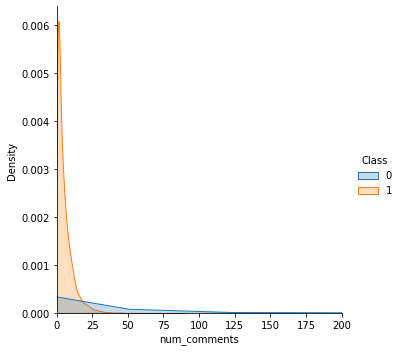

In [26]:
#visualzie 
sns.displot(data=df, x='num_comments', hue='Class', kind='kde', fill=True)
plt.xlim([0, 200])
plt.xlabel('num_comments')

Text(0.5, 6.79999999999999, 'score')

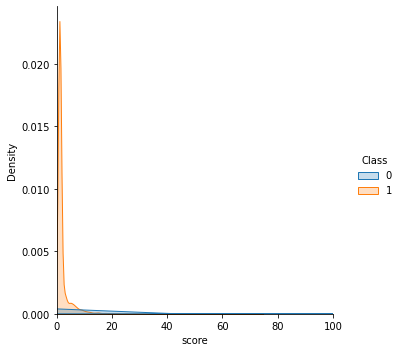

In [27]:
sns.displot(data=df, x='score', hue='Class', kind='kde', fill=True)
plt.xlim([0, 100])
plt.xlabel('score')

Text(0.5, 6.79999999999999, 'upvote_ratio')

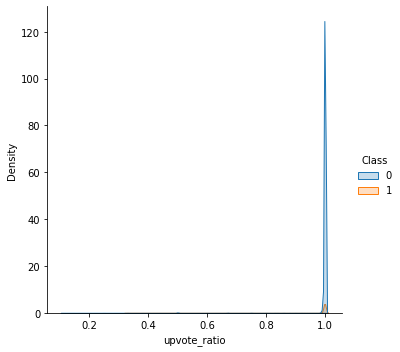

In [28]:
sns.displot(data=df, x='upvote_ratio', hue='Class', kind='kde', fill=True)
plt.xlabel('upvote_ratio')

Text(0.5, 6.79999999999999, 'hour')

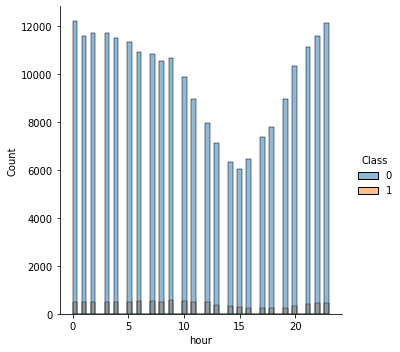

In [29]:
sns.displot(data=df, x='hour', hue='Class', kind='hist', fill=True)
plt.xlabel('hour')

Text(0.5, 6.79999999999999, 'hour')

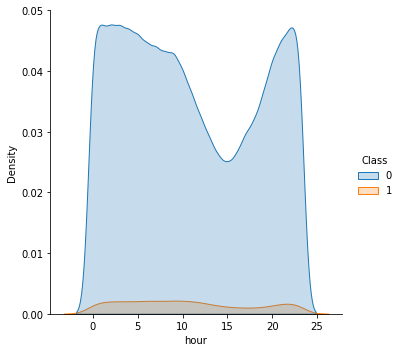

In [30]:
sns.displot(data=df, x='hour', hue='Class', kind='kde', fill=True)
plt.xlabel('hour')

Text(0.5, 6.79999999999999, 'body_len')

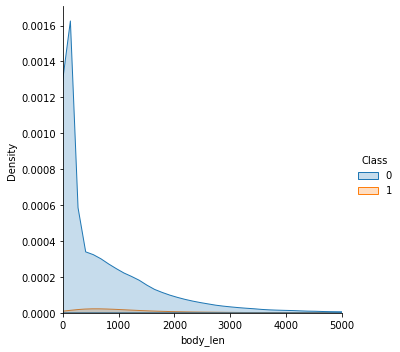

In [31]:
sns.displot(data=df, x='body_len', hue='Class', kind='kde', fill=True)
plt.xlim([0,5000])
plt.xlabel('body_len')

Don't see any obvious patters between dv and other group, keep them as features for now

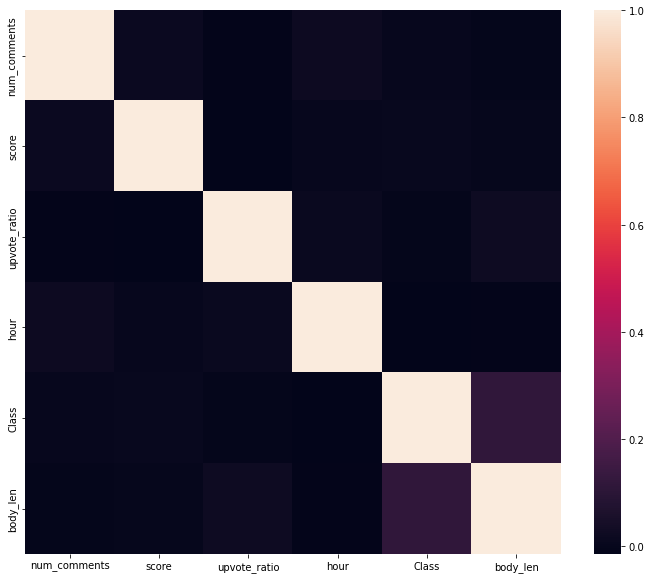

In [32]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());

In [ ]:
path = '/content/drive/My Drive/capstone/dv/clean.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f,index_label=None)